In [83]:
#Basic imports for EDA and model fitting
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [84]:
#import regarding metrics used
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score, roc_auc_score, roc_curve 

In [85]:
#Imports regarding NLP
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
#Downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
from nltk.corpus import stopwords

In [88]:
#Reading the input file 
message = pd.read_csv('/content/SMSSpamCollection.csv', sep = '\t', names =['label', 'message'])
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [89]:
#Initializing Stemmer for word Stemming
stemmer = PorterStemmer()

In [90]:
#Initial Preprocessing steps
cleaned_message = []
for i in range(len(message)):
  cleaned_text = re.sub('[^a-zA-Z]', ' ', message['message'][i])
  cleaned_text = cleaned_text.lower()
  cleaned_text = cleaned_text.split()

  final_text = [stemmer.stem(text) for text in cleaned_text if text not in stopwords.words('english')]
  final_text = " ".join(final_text)
  cleaned_message.append(final_text)

In [91]:
#Using count vectorizer to create a Bag of words 
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(cleaned_message).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
#mapping Ham to class label 0 and Spam to 1.
message['label'] = message['label'].map({'ham': 0, 'spam':1})
message

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [93]:
#To check if the dataset is imbalanced
message.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

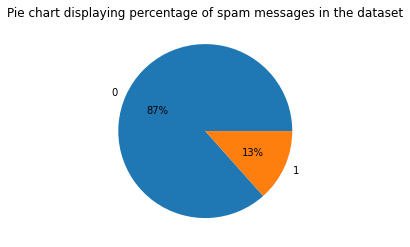

In [94]:
#Plotting Pie chart to view the ratio to Spam messages to Ham
message['label'].value_counts().plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart displaying percentage of spam messages in the dataset')
plt.ylabel('')
plt.show()

## This piechart also indicate that we want our train/test accuracy to be greater than 87% other wise our model
## is no good that just guessing every message to be "Not Spam". 

In [95]:
# Creating output variable and doing the train test split.
Y = message['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 3000), (1839, 3000)]


In [96]:
# Check for the various values of regularization parameter, which one gives
# the best result.
list_C = np.arange(0.1, 1, 0.15)
train_score = np.zeros(len(list_C))
test_score = np.zeros(len(list_C))
p_score = np.zeros(len(list_C))
r_score = np.zeros(len(list_C))
count = 0
for reg in list_C:
  model = SVC(C = reg, kernel ='linear')
  model.fit(X_train, y_train)
  train_score[count] = model.score(X_train, y_train)
  test_score[count] = model.score(X_test, y_test)
  temp = model.predict(X_test)
  p_score[count] = precision_score(y_test, temp)
  r_score[count] = recall_score(y_test, temp)
  count +=1

In [97]:
# Creating Matrix of the above for loop and selecting the best model for training 
matrix = np.matrix(np.c_[list_C, train_score, test_score, r_score, p_score])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.10,0.990892,0.985862,0.894309,1.000000
1,0.25,0.997321,0.987493,0.906504,1.000000
2,0.40,0.998125,0.986406,0.910569,0.986784
3,0.55,0.997857,0.986406,0.910569,0.986784
4,0.70,0.998393,0.985862,0.906504,0.986726
5,0.85,0.998661,0.985318,0.906504,0.982379


In [98]:
#building the model by choosing the best value from the above table.
model = SVC(C = 0.4, kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [99]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.986784140969163
0.9105691056910569


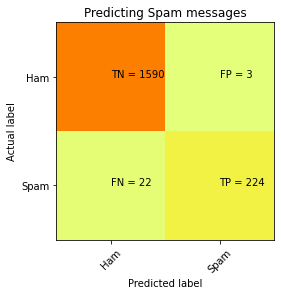

In [100]:
#Plotting the confusion Matrix to visualize the performance of our
# model

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classnames = ['Ham', 'Spam']
plt.title('Predicting Spam messages')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=45)
plt.yticks(tick_marks, classnames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

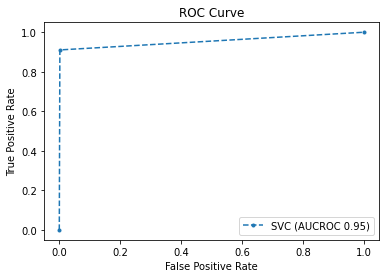

In [101]:
# plotting the AUC ROC curve to check model performance

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_svm = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, linestyle = "--", marker = ".", label = 'SVC (AUCROC %0.2f)' % auc_svm)

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()
plt.show()